<a href="https://colab.research.google.com/github/emrullahozkilinc/machine-learning/blob/master/heart_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook written for predict chance of having a heart attack. It uses the following to calculate it; age, exercise, number of clogged blood vessel, chest pain type, blood pressure, cholestoral, blood sugar, electrocardiographic results and heart rate. Our target columns is "target". "1" means big chance of heart attack and "0" means little chance of heart attack. Dataset includes 303 samples. This samples although relatively little it is enough for our example. We will use adaboost, gradientboost and xgboost algorithms for create our models.

# Libraries

First 3 row imports basic packages. Seaborn for expert graphs. xgboost, AdaBoostClassifier, GradientBoostingClassifier for create our models. Classifier letter in ada and gradiendt using for our model is a classifier model, not regression. DecisionTreeClassifier for using in xgboost algorithm. train_test_split for seperate our dataset to train and test set. confusion_matrix and plot_confusion_matrix for plot and calculate confusion matrix.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# Descriptive stats

We import dataset.

In [2]:
url="https://raw.githubusercontent.com/emrullahozkilinc/machine-learning/master/dataset/heart.csv"
data = pd.read_csv(url)
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Distribution plot for "Age" column. We can see in following graph age of our samples generally between 40-65.

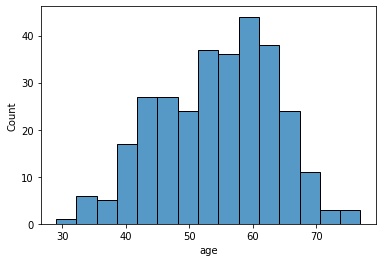

In [7]:
sns.histplot(data=data, x='age', bins=15)

([<matplotlib.patches.Wedge at 0x7f19cc3beb90>,
 [Text(-0.5986245291714798, 0.9228481310997082, 'Male'),
  Text(0.5986244427681994, -0.9228481871469777, 'Female')],
 [Text(-0.32652247045717075, 0.503371707872568, '68.3%'),
  Text(0.3265224233281087, -0.5033717384438059, '31.7%')])

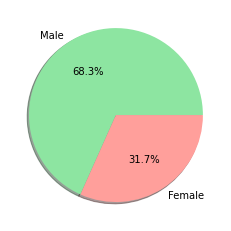

In [9]:
total_male = len(data.loc[data['sex']==1])
total_female = len(data.loc[data['sex']==0])

labels = ['Male','Female']

colors = sns.color_palette('pastel')[2:4]

plt.pie([total_male, total_female], labels=labels, autopct='%1.1f%%', shadow=True, colors=colors )


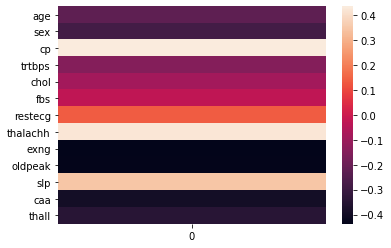

In [ ]:
correlations = np.corrcoef(data.T)
corr_target_all = correlations[-1].reshape(14,1)
corr_target = corr_target_all[:13]
sns.heatmap(corr_target, yticklabels=data.columns[:13],)

In [ ]:
corr_target_edited = pd.DataFrame(corr_target, index=data.columns[:13], columns=['Absoluted Correlations'])
corr_target_edited = np.abs(corr_target_edited)
corr_target_edited.sort_values(by=['Absoluted Correlations'], ascending=False)

,Absoluted Correlations
exng,0.436757
cp,0.433798
oldpeak,0.430696
thalachh,0.421741
caa,0.391724
slp,0.345877
thall,0.344029
sex,0.280937
age,0.225439
trtbps,0.144931


In [ ]:
X = data.iloc[:,:13]
y = data['output']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
def ada_classifier(depth, n_estimators):
  classifier = AdaBoostClassifier(
      DecisionTreeClassifier(max_depth=depth),
      n_estimators=n_estimators)

  return classifier

In [ ]:
ada = ada_classifier(1,50).fit(X_train, y_train)
predicted_ada = ada.predict(X_test)

In [ ]:
conf_mat = {}

In [ ]:
ada_conf = confusion_matrix(y_test, predicted_ada)
conf_mat['ada'] = ada_conf

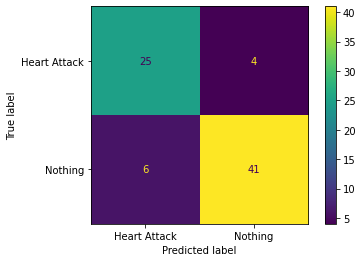

In [ ]:
plot_confusion_matrix(ada, X_test, y_test, display_labels=['Heart Attack','Nothing'])

In [ ]:
gradient_classifier = GradientBoostingClassifier(loss='exponential')

In [ ]:
gradient = gradient_classifier.fit(X_train, y_train)
predicted_gradient = gradient.predict(X_test)

In [ ]:
gradient_conf = confusion_matrix(y_test, predicted_gradient)
conf_mat['gradient'] = gradient_conf

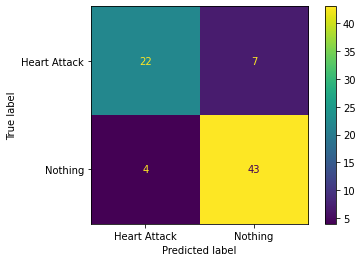

In [ ]:
plot_confusion_matrix(gradient, X_test, y_test, display_labels=['Heart Attack','Nothing'])

In [ ]:
xgb = xgboost.XGBClassifier()

In [ ]:
xgb.fit(X_train, y_train)
predicted_xgboost = xgb.predict(X_test)

In [ ]:
xgb_conf = confusion_matrix(y_test, predicted_xgboost)
conf_mat['xgb'] = xgb_conf

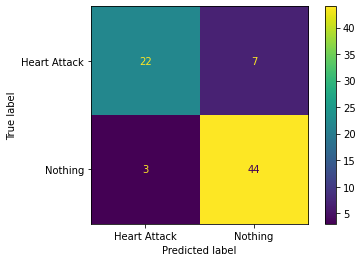

In [ ]:
plot_confusion_matrix(xgb, X_test, y_test, display_labels=['Heart Attack','Nothing'])

In [ ]:
def print_metrics(conf_matrix):
  TP = conf_matrix[0,0]
  FN = conf_matrix[0,1]
  FP = conf_matrix[1,0]
  TN = conf_matrix[1,1]
  print('----------------------------')
  print('Accuracy:',    round(((TP+TN)/(TP+FN+FP+TN)),3))
  print('Sensitivity:', round(((TP)/(TP+FN)),3))
  print('Specificity:', round(((TN)/(FP+TN)),3))
  print('Precision:',   round(((TP)/(TP+FP)),3))
  print('Negative Predictive Value:',    round(((TN)/(FN+TN)),3))
  print('----------------------------\n')

In [ ]:
for x,y in conf_mat.items():
  print(x, ' results:')
  print_metrics(y)

ada  results:
----------------------------
Accuracy: 0.868
Sensitivity: 0.862
Specificity: 0.872
Precision: 0.806
Negative Predictive Value: 0.911
----------------------------

gradient  results:
----------------------------
Accuracy: 0.855
Sensitivity: 0.759
Specificity: 0.915
Precision: 0.846
Negative Predictive Value: 0.86
----------------------------

xgb  results:
----------------------------
Accuracy: 0.868
Sensitivity: 0.759
Specificity: 0.936
Precision: 0.88
Negative Predictive Value: 0.863
----------------------------

